In [1]:
%ls

'2,3peak mix.ipynb'                    center.csv
'5peak 3 para when it worksss.ipynb'   graph.csv
'Fitting_with_noise (1).ipynb'         labels.png
 ITO_O1s_bg.txt                        model.png
 ITO_O1s_exp.txt                       model_shapes.png
 ITO_O1s_fitting.txt                   peak_number.csv
 ITO_O1s_p1.txt                        width.csv
 ITO_O1s_p2.txt                       '논문 수정.ipynb'
 ITO_O1s_p3.txt                       '데이터 얻기.ipynb'
 P3HT_S2p_bg.txt                      '저장된 데이터로 학습하기.ipynb'
 P3HT_S2p_exp.txt                     '저장된 데이터로 학습하기10.ipynb'
 P3HT_S2p_fitting.txt                 '저장된 데이터로 학습하기11.ipynb'
 P3HT_S2p_p1.txt                      '저장된 데이터로 학습하기12.ipynb'
 P3HT_S2p_p2.txt                      '저장된 데이터로 학습하기13.ipynb'
 PeakDetection.ipynb                  '저장된 데이터로 학습하기2.ipynb'
 Untitled.ipynb                       '저장된 데이터로 학습하기3.ipynb'
 Untitled1.ipynb                      '저장된 데이터로 학습하기4.ipynb'
 Untitled2.ipynb                      '저장된 데이터

In [2]:
import pandas as pd
import numpy as np

In [3]:
graph = pd.read_csv('graph.csv').values[:,1:]
center= pd.read_csv('center.csv').values[:,1:]
width= pd.read_csv('width.csv').values[:,1:]
amp= pd.read_csv('amp.csv').values[:,1:]
peak_number= pd.read_csv('peak_number.csv').values[:,1:]

In [4]:
peak_number=peak_number.reshape(2000000,)

In [5]:
print(center[0:10])
print(width[0:10])
print(amp[0:10])
print(peak_number[0:10])
print(center.shape)
print(width.shape)
print(amp.shape)
print(peak_number.shape)
print(graph.shape)
print(graph)

[[ 0.          6.08688456 11.0810396 ]
 [ 5.07493349  8.25999368 11.36195096]
 [ 0.          2.67516221 10.60419171]
 [ 0.          5.54053864 12.23836258]
 [ 0.          4.08422309  7.21849474]
 [ 0.          7.30192691 12.34014272]
 [ 0.          2.54016398  5.16493207]
 [ 0.          4.67819908  6.09299318]
 [ 4.90655934  5.13202252 10.34134357]
 [ 0.          5.36008602  5.98285268]]
[[0.         1.24062404 0.95374601]
 [0.60456503 0.35785198 1.1738216 ]
 [0.         1.17339162 1.12952083]
 [0.         0.81456259 0.81987822]
 [0.         0.81681444 1.70560007]
 [0.         0.32207246 0.75414831]
 [0.         0.30486538 1.895045  ]
 [0.         0.59293989 0.4647601 ]
 [1.46428848 1.12931752 1.8841104 ]
 [0.         1.00584571 1.33599321]]
[[0.         0.21158879 0.18180892]
 [0.11125957 0.85593768 0.31159992]
 [0.         0.59012228 0.71652582]
 [0.         1.00856931 0.70388527]
 [0.         0.94976759 0.16667863]
 [0.         0.43501787 0.93207997]
 [0.         0.8393851  0.570734

In [6]:
import matplotlib.pyplot as plt
x = np.linspace(0, 15, 401) 
def y(a,b,c,x):
    beta = 5.09791537e-01
    gamma = 4.41140472e-01
    y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
#     y = c*(b**2)/((x-a)**2+b**2)
    return y

<ipython-input-6-69a298250a73>:6: RuntimeWarning: divide by zero encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-6-69a298250a73>:6: RuntimeWarning: invalid value encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-6-69a298250a73>:6: RuntimeWarning: divide by zero encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-6-69a298250a73>:6: RuntimeWarning: invalid value encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-6-69a298250a73>:6: RuntimeWarning: divide by zero encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipytho

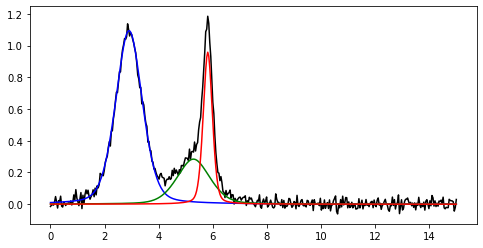

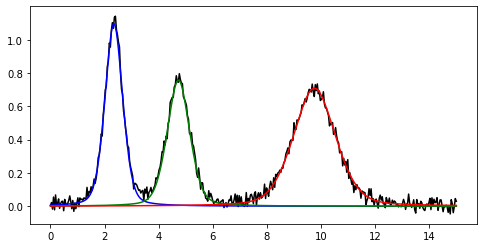

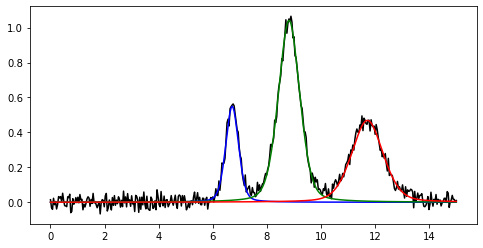

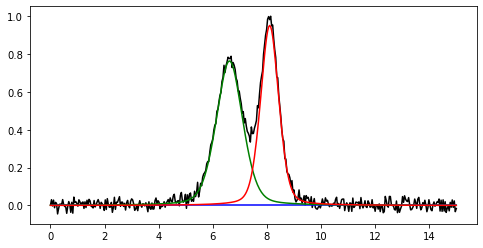

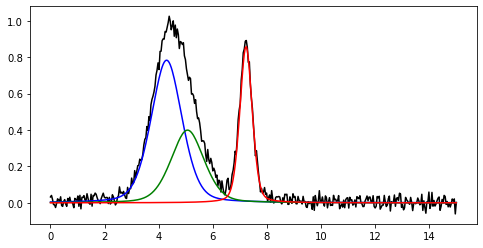

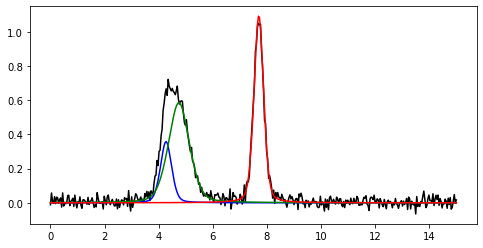

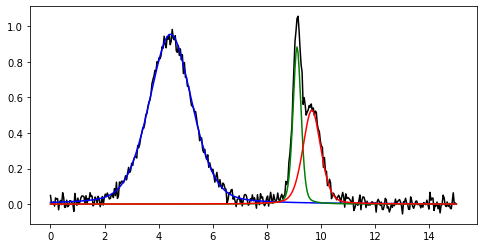

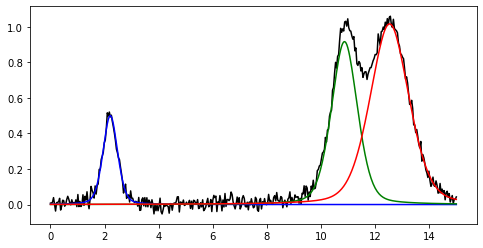

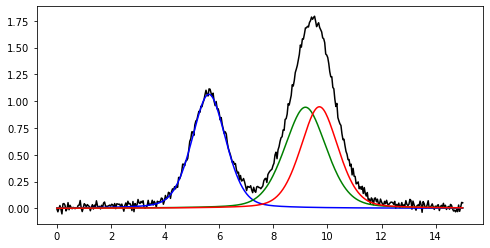

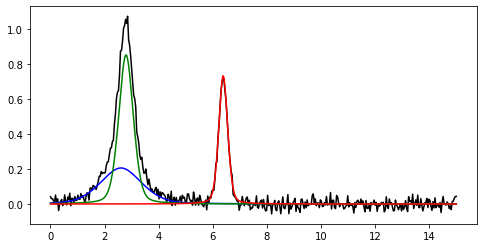

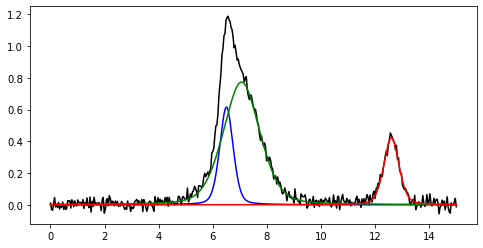

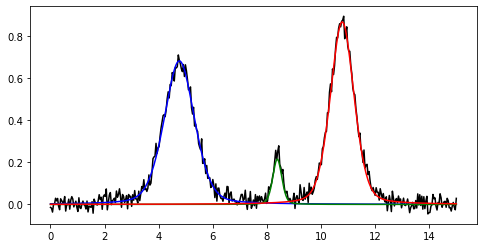

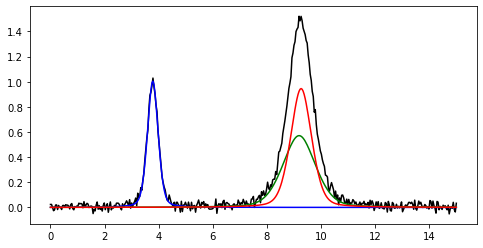

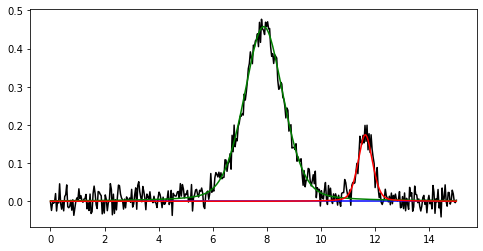

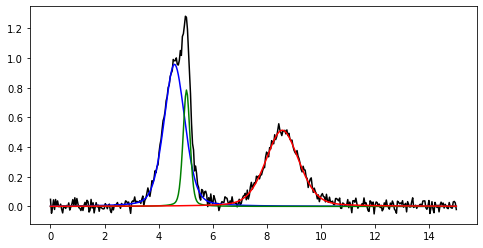

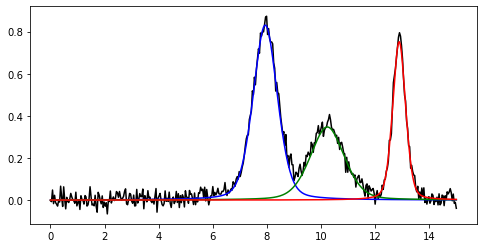

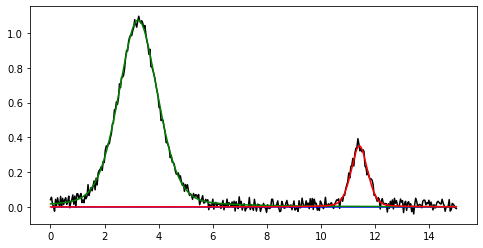

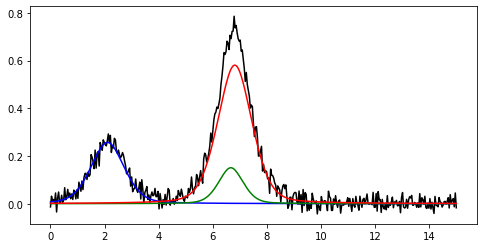

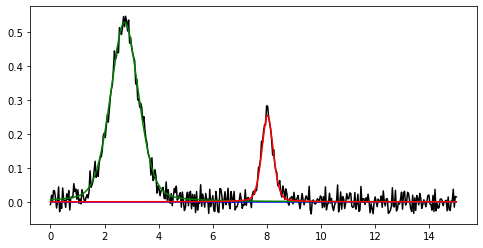

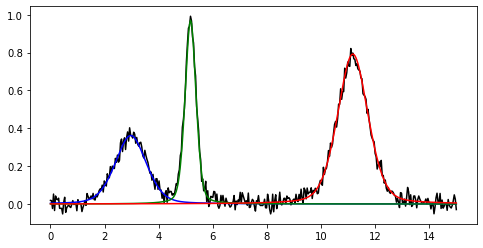

In [7]:
for i in range(20,40):
    plt.figure(figsize = (8,4))
    plt.plot(x,graph[i],color = 'black')
    plt.plot(x,y(center[i][0],width[i][0],amp[i][0],x), color = 'blue')
    plt.plot(x,y(center[i][1],width[i][1],amp[i][1],x), color= 'green')
    plt.plot(x,y(center[i][2],width[i][2],amp[i][2],x), color='red')

In [9]:
#90:9:1
# 8:1:1로 해보자
data_number=1000000

train_graph = graph[:int(0.8*2*data_number)]
val_graph = graph[int(0.8*2*data_number):int(0.9*2*data_number)]
test_graph = graph[int(0.9*2*data_number):]

train_center = center[:int(0.8*2*data_number)]
val_center = center[int(0.8*2*data_number):int(0.9*2*data_number)]
test_center = center[int(0.9*2*data_number):]

train_width = width[:int(0.8*2*data_number)]
val_width = width[int(0.8*2*data_number):int(0.9*2*data_number)]
test_width = width[int(0.9*2*data_number):]

train_amp = amp[:int(0.8*2*data_number)]
val_amp = amp[int(0.8*2*data_number):int(0.9*2*data_number)]
test_amp = amp[int(0.9*2*data_number):]

train_peak_number = peak_number[:int(0.8*2*data_number)]
val_peak_number = peak_number[int(0.8*2*data_number):int(0.9*2*data_number)]
test_peak_number = peak_number[int(0.9*2*data_number):]

In [10]:
print(train_graph.shape, val_graph.shape, test_graph.shape)
print(train_center.shape, val_center.shape, test_center.shape)
print(train_width.shape, val_width.shape, test_width.shape)
print(train_amp.shape, val_amp.shape, test_amp.shape)
print(train_peak_number.shape, val_peak_number.shape, test_peak_number.shape)

(1600000, 401) (200000, 401) (200000, 401)
(1600000, 3) (200000, 3) (200000, 3)
(1600000, 3) (200000, 3) (200000, 3)
(1600000, 3) (200000, 3) (200000, 3)
(1600000,) (200000,) (200000,)


In [11]:
# conv1d 쓰기 위해 reshape 사용 
# 1차원 그래프 변환

train_graph = train_graph.reshape(train_graph.shape[0],train_graph.shape[1],1)
val_graph = val_graph.reshape(val_graph.shape[0],val_graph.shape[1],1)
test_graph = test_graph.reshape(test_graph.shape[0],test_graph.shape[1],1)

print(train_graph.shape)
print(val_graph.shape)
print(test_graph.shape)

(1600000, 401, 1)
(200000, 401, 1)
(200000, 401, 1)


In [12]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D, GlobalMaxPooling1D
from keras.layers.merge import concatenate
from keras import layers

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 401, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 61, 32)       3232        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 30, 32)       0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 27, 64)       8256        max_pooling1d[0][0]              
______________________________________________________________________________________________

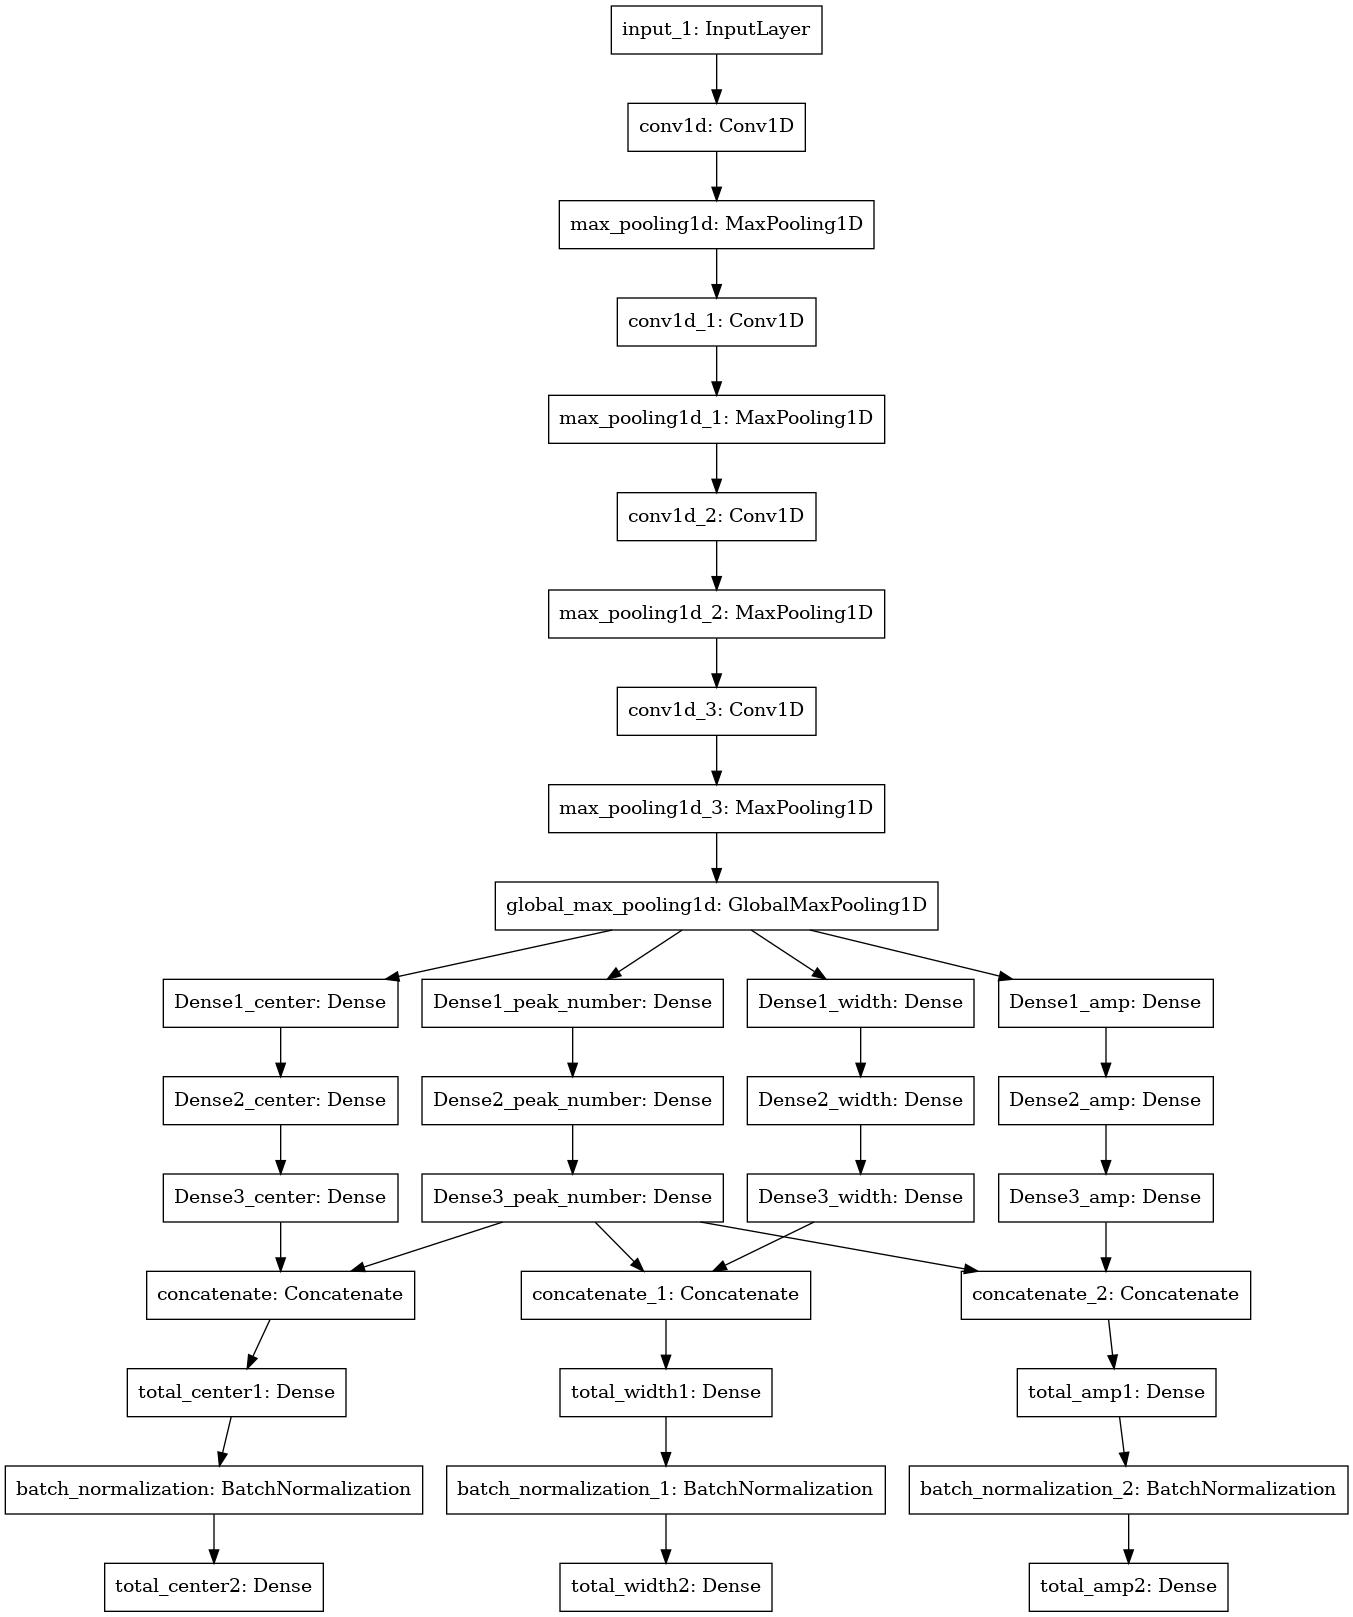

In [13]:

input_data = Input(shape = (len(x), 1))

t = layers.Conv1D(32,100,strides=5,activation = 'relu')(input_data)
t = layers.MaxPooling1D(2)(t)
t = layers.Conv1D(64,4,activation = 'relu')(t)
t = layers.MaxPooling1D(2)(t)
t = layers.Conv1D(128,4,activation = 'relu')(t)
t = layers.MaxPooling1D(2)(t)
t = layers.Conv1D(192,2,activation = 'relu')(t)
t = layers.MaxPooling1D(2)(t)

t = layers.GlobalMaxPooling1D()(t)


Dense1_peak_number = Dense(200, activation = 'relu',name='Dense1_peak_number')(t)
Dense2_peak_number = Dense(200, activation = 'relu',name = 'Dense2_peak_number')(Dense1_peak_number)
Dense3_peak_number = Dense(1, activation = 'linear',name = 'Dense3_peak_number')(Dense2_peak_number)


Dense1_center = Dense(200, activation = 'relu',name='Dense1_center')(t)
Dense2_center = Dense(100, activation = 'relu',name='Dense2_center')(Dense1_center)
Dense3_center = Dense(40, activation = 'relu',name='Dense3_center')(Dense2_center)
# output_center = Dense(3, activation = 'linear',name='output_center')(Dense3_center)

Dense1_width = Dense(200,activation = 'relu',name='Dense1_width')(t)
Dense2_width = Dense(100,activation = 'relu',name='Dense2_width')(Dense1_width)
Dense3_width = Dense(40,activation = 'relu',name='Dense3_width')(Dense2_width)
# output_width = Dense(3,activation = 'linear',name='output_width')(Dense3_width)

Dense1_amp = Dense(200,activation = 'relu',name='Dense1_amp')(t)
Dense2_amp = Dense(100,activation = 'relu',name='Dense2_amp')(Dense1_amp)
Dense3_amp = Dense(40,activation = 'relu',name='Dense3_amp')(Dense2_amp)
# output_amp = Dense(3,activation = 'linear',name='output_amp')(Dense3_amp)

center_merge = concatenate([Dense3_peak_number,Dense3_center])
total_center1 = Dense(40, activation = 'relu',name = 'total_center1')(center_merge)
center_Batchnormalization  = BatchNormalization()(total_center1)
# total_center2 = Dense(40, activation = 'relu',name = 'total_center2')(total_center1)
total_center2 = Dense(3, activation = 'linear',name = 'total_center2')(center_Batchnormalization)


width_merge = concatenate([Dense3_peak_number,Dense3_width])
total_width1 = Dense(40, activation = 'relu',name = 'total_width1')(width_merge)
width_Batchnormalization  = BatchNormalization()(total_width1)
# total_width2 = Dense(40, activation = 'relu',name = 'total_width2')(total_width1)
total_width2= Dense(3, activation = 'linear',name = 'total_width2')(width_Batchnormalization)


amp_merge = concatenate([Dense3_peak_number,Dense3_amp])
total_amp1 = Dense(40, activation = 'relu',name = 'total_amp1')(amp_merge)
amp_Batchnormalization  = BatchNormalization()(total_amp1)
# total_amp2 = Dense(40, activation = 'relu',name = 'total_amp2')(total_amp1)
total_amp2 = Dense(3, activation = 'linear',name = 'total_amp2')(amp_Batchnormalization)


model = Model(inputs = input_data,
              outputs = [Dense3_peak_number,total_center2,total_width2,total_amp2])
print(model.summary())
plot_model(model)

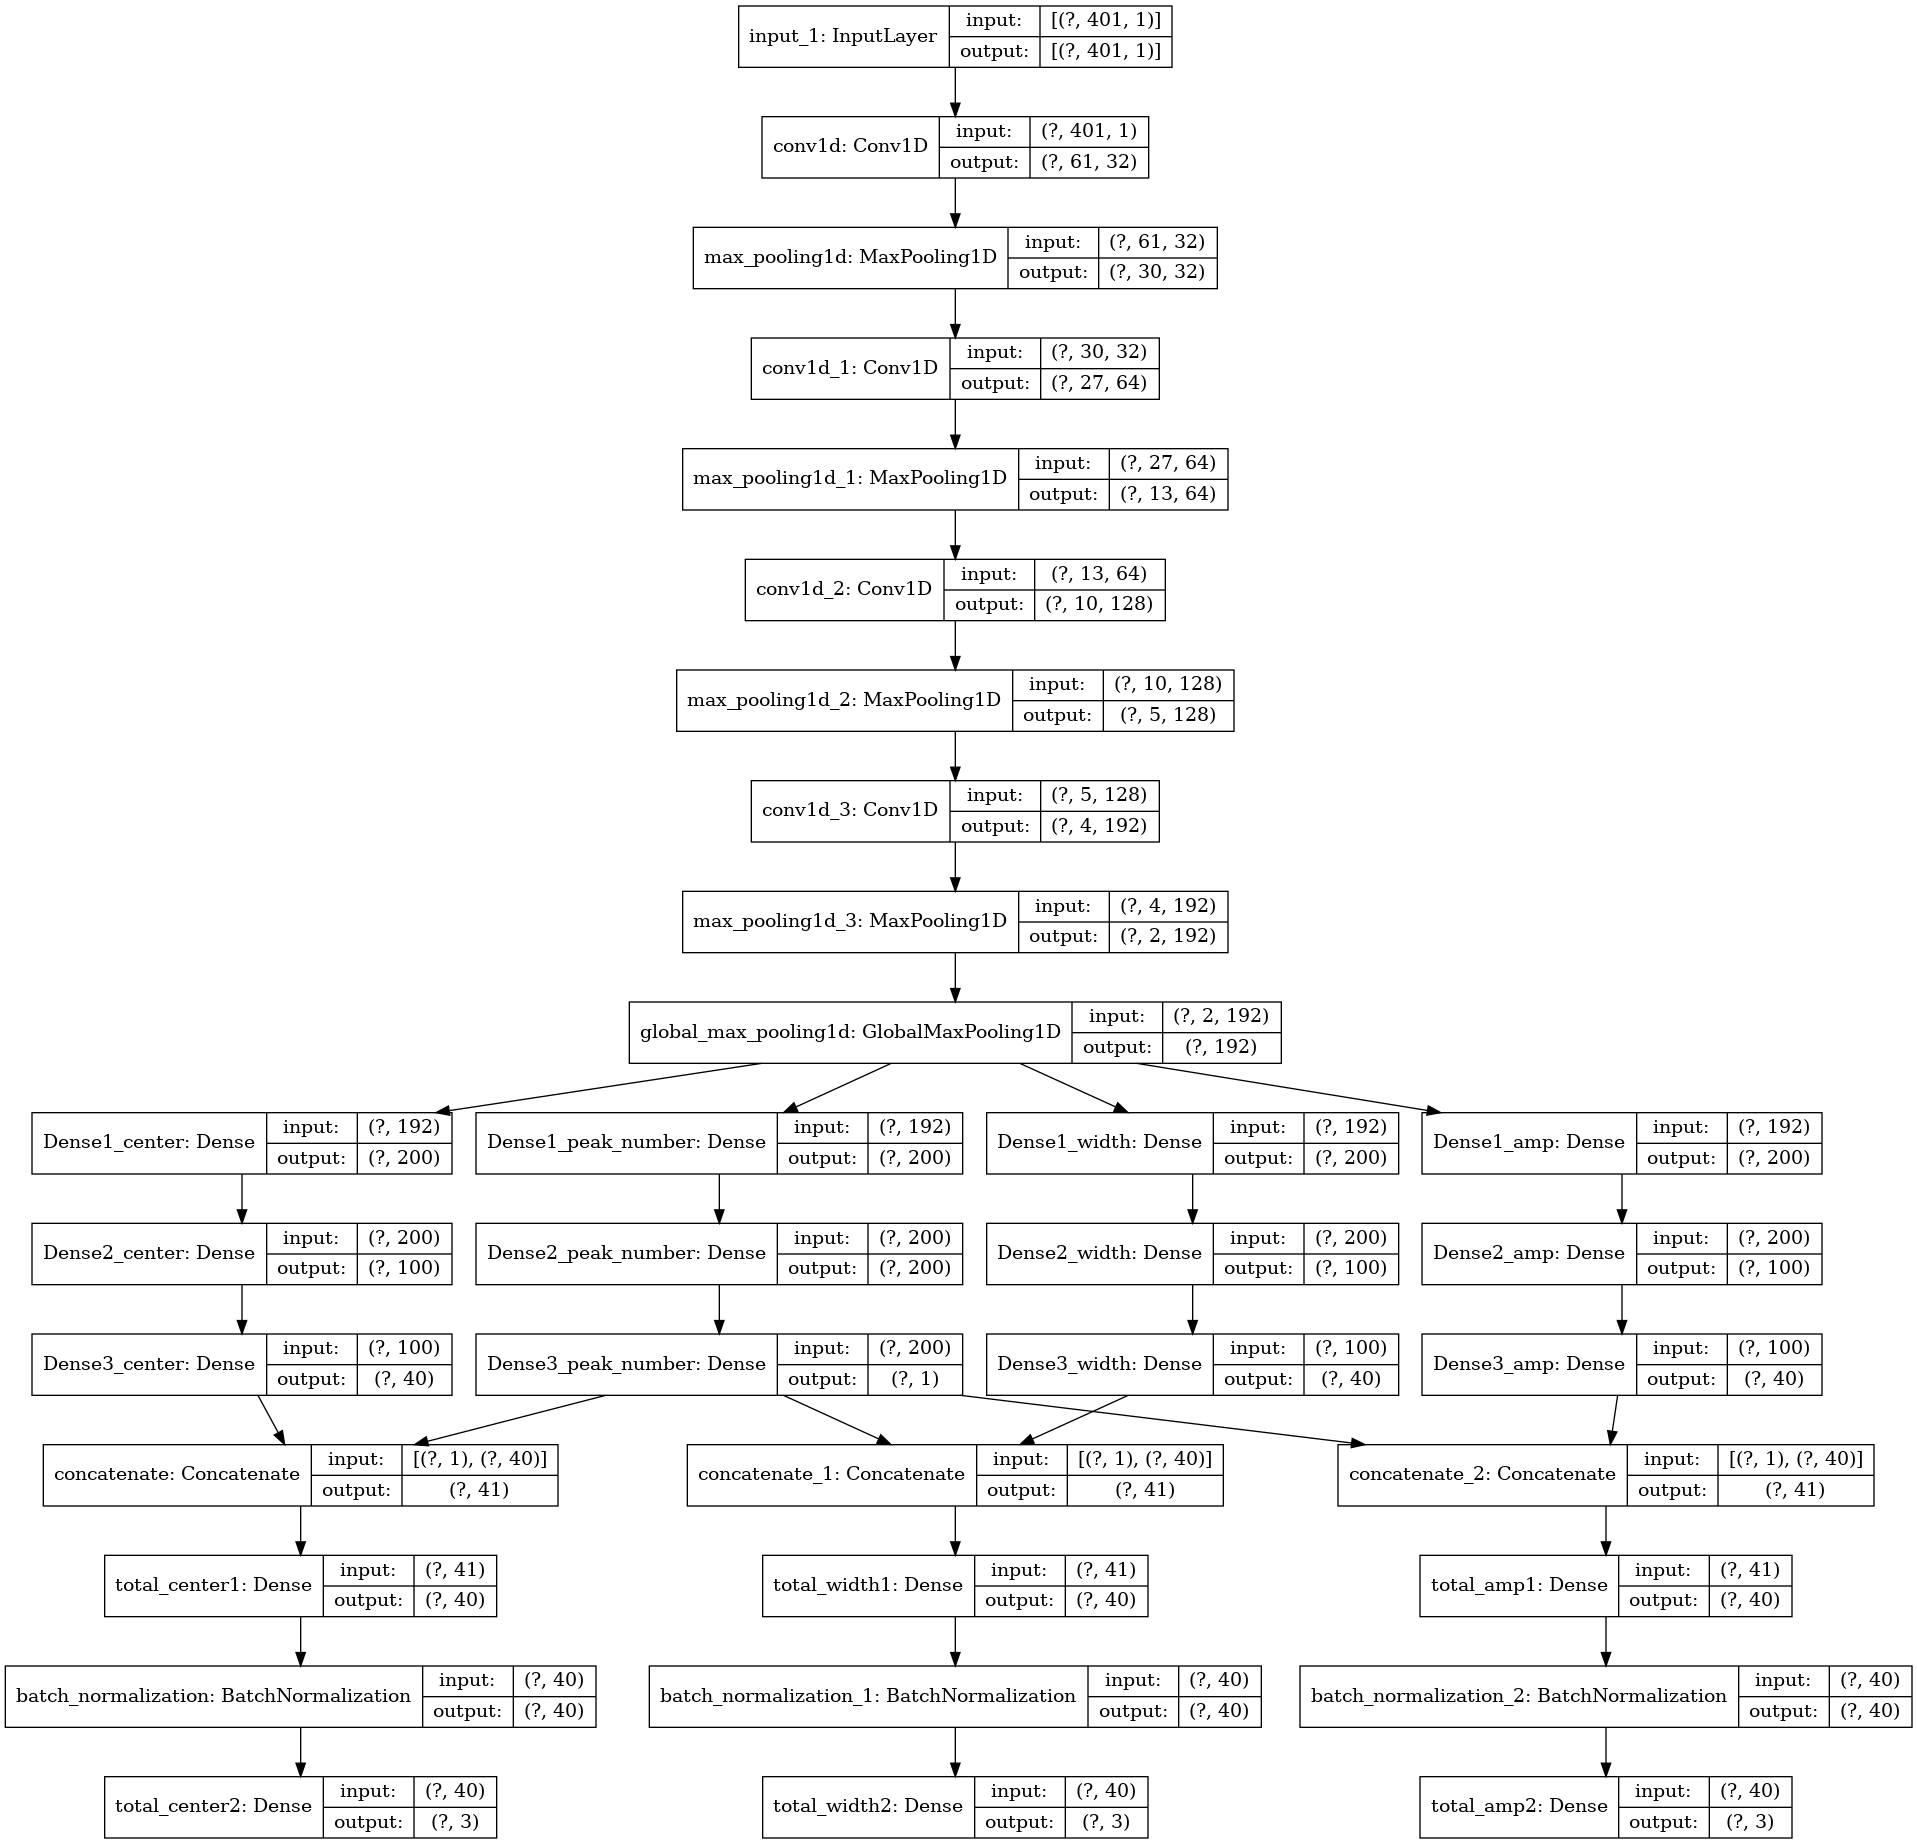

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file = 'labels.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [15]:
model.compile(optimizer='adam',
              loss = {'total_center2' : 'mse',
                      'total_width2' : 'mse',
                      'total_amp2' : 'mse',
                      'Dense3_peak_number' : 'mse'},
#               loss_weights={'total_center3' : 0.5,
#                            'total_width3' : 1,
#                            'total_amp3' : 1,
#                             'Dense3_peak_number' :1 },
              metrics = ['mae'])

In [16]:
models=model.fit(train_graph, [train_peak_number,train_center , train_width, train_amp],
          epochs = 50,
          batch_size = 1000,
          validation_data = (val_graph, [val_peak_number, val_center, val_width, val_amp]))

Epoch 1/50
1600/1600 [==============================] - 21s 13ms/step - loss: 6.0034 - Dense3_peak_number_loss: 0.1071 - total_center2_loss: 5.7524 - total_width2_loss: 0.1041 - total_amp2_loss: 0.0397 - Dense3_peak_number_mae: 0.2268 - total_center2_mae: 1.1965 - total_width2_mae: 0.2120 - total_amp2_mae: 0.1418 - val_loss: 0.4002 - val_Dense3_peak_number_loss: 0.0278 - val_total_center2_loss: 0.3016 - val_total_width2_loss: 0.0451 - val_total_amp2_loss: 0.0257 - val_Dense3_peak_number_mae: 0.1163 - val_total_center2_mae: 0.3056 - val_total_width2_mae: 0.1494 - val_total_amp2_mae: 0.1187
Epoch 2/50
1600/1600 [==============================] - 20s 13ms/step - loss: 0.3723 - Dense3_peak_number_loss: 0.0209 - total_center2_loss: 0.2937 - total_width2_loss: 0.0380 - total_amp2_loss: 0.0196 - Dense3_peak_number_mae: 0.0837 - total_center2_mae: 0.2817 - total_width2_mae: 0.1282 - total_amp2_mae: 0.0957 - val_loss: 0.3463 - val_Dense3_peak_number_loss: 0.0242 - val_total_center2_loss: 0.2669

In [17]:
test_graph.shape

(200000, 401, 1)

In [18]:
for key in models.history.keys():
    print(key)

loss
Dense3_peak_number_loss
total_center2_loss
total_width2_loss
total_amp2_loss
Dense3_peak_number_mae
total_center2_mae
total_width2_mae
total_amp2_mae
val_loss
val_Dense3_peak_number_loss
val_total_center2_loss
val_total_width2_loss
val_total_amp2_loss
val_Dense3_peak_number_mae
val_total_center2_mae
val_total_width2_mae
val_total_amp2_mae


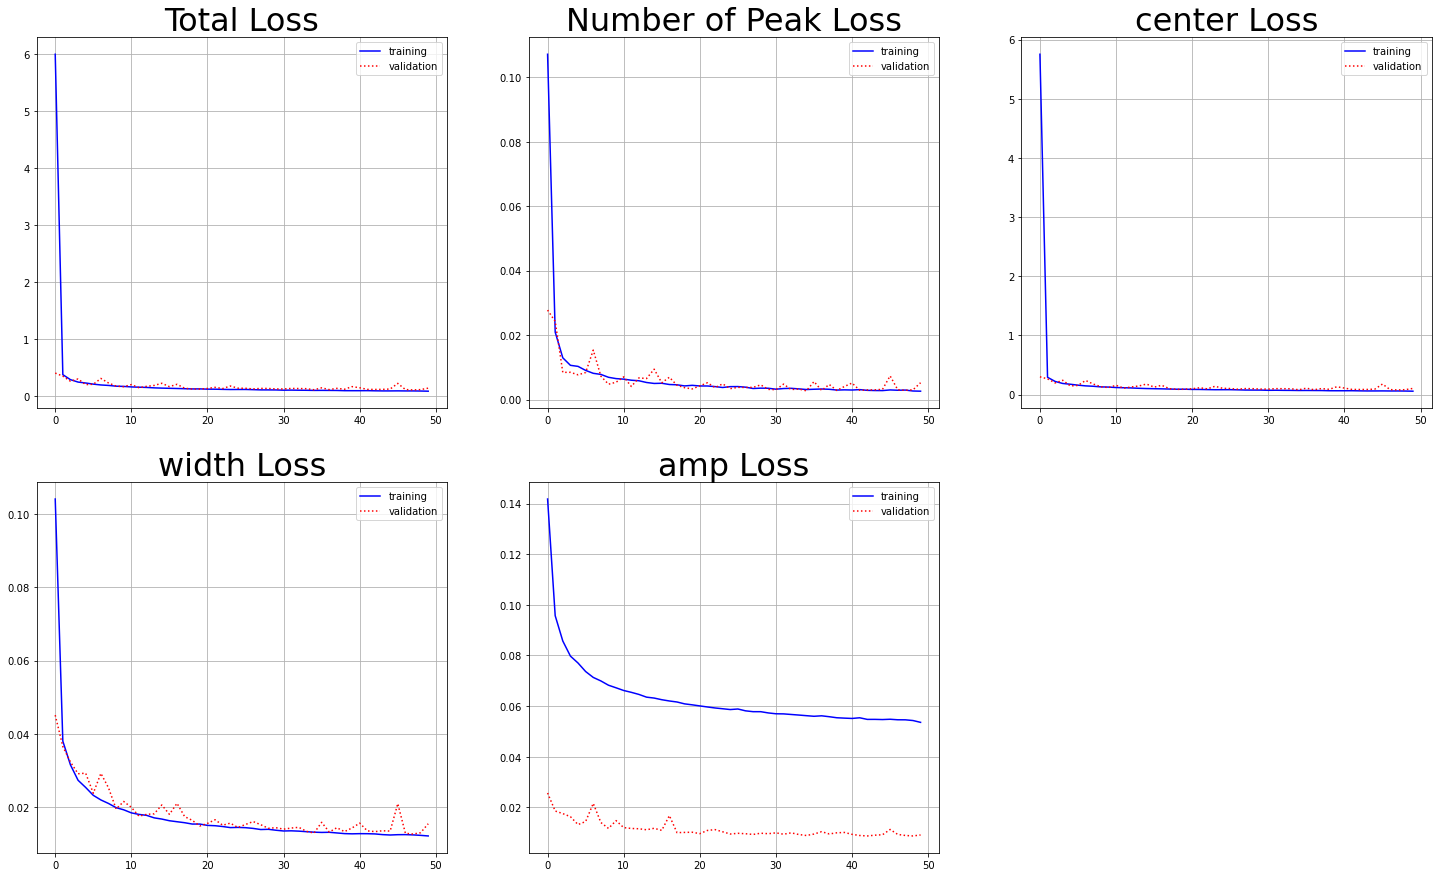

In [19]:
plt.figure(figsize = (25, 15))

plt.subplot(231)
plt.plot(models.history['loss'], 'b-', label = 'training')
plt.plot(models.history['val_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Total Loss", size = 32)
plt.legend()


plt.subplot(232)
plt.plot(models.history['Dense3_peak_number_loss'], 'b-', label = 'training')
plt.plot(models.history['val_Dense3_peak_number_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Number of Peak Loss", size = 32)
plt.legend()

plt.subplot(233)
plt.plot(models.history['total_center2_loss'], 'b-', label = 'training')
plt.plot(models.history['val_total_center2_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("center Loss", size = 32)
plt.legend()

plt.subplot(234)
plt.plot(models.history['total_width2_loss'], 'b-', label = 'training')
plt.plot(models.history['val_total_width2_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("width Loss", size = 32)
plt.legend()


plt.subplot(235)
plt.plot(models.history['total_amp2_mae'], 'b-', label = 'training')
plt.plot(models.history['val_total_amp2_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("amp Loss", size = 32)
plt.legend()


In [20]:
prediction = model.predict(test_graph)
print(len(prediction))

4


In [21]:
print(prediction[0].shape)
print(prediction[1].shape)# if center
print(prediction[2].shape)# width
print(prediction[3].shape)# amp

(200000, 1)
(200000, 3)
(200000, 3)
(200000, 3)


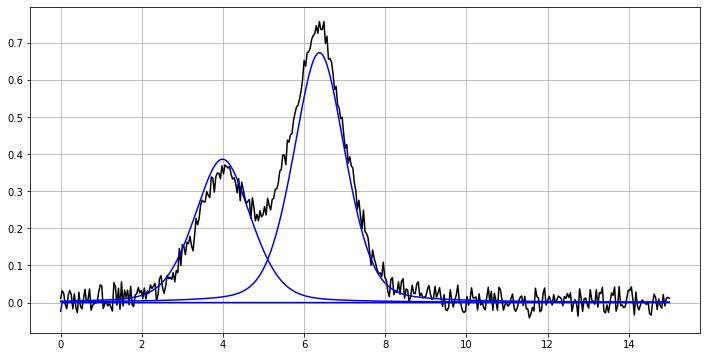

real_center   [0.         3.98914235 6.34051708]
predict_center [ 0.0031954572 3.9900527 6.3768325 ]
---------------
real_width    [0.         1.51426932 1.60997437]
predict_center [ -0.020333305 1.6572565 1.5200937 ]
---------------
real_amp      [0.         0.33776936 0.72153012]
predict_center [ -0.025618672 0.38627344 0.6732466 ]


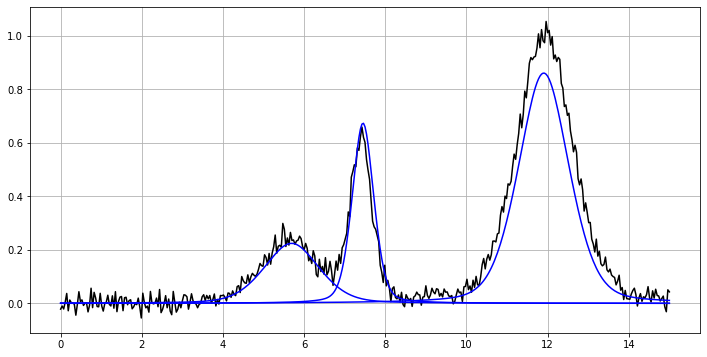

real_center   [ 5.64161476  7.40909913 11.93112874]
predict_center [ 5.691014 7.4505663 11.905145 ]
---------------
real_width    [1.5389886  0.63983375 1.6263252 ]
predict_center [ 1.617547 0.6324061 1.4862071 ]
---------------
real_amp      [0.23398103 0.59640932 1.01499111]
predict_center [ 0.22438431 0.6740574 0.86108583 ]


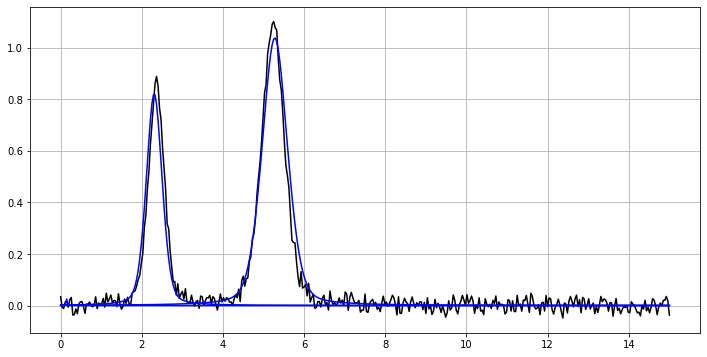

real_center   [0.         2.36293756 5.23140044]
predict_center [ 0.13856047 2.3061476 5.2775254 ]
---------------
real_width    [0.         0.45054558 0.66241039]
predict_center [ 0.027211547 0.46536547 0.74513054 ]
---------------
real_amp      [0.         0.86978103 1.09852126]
predict_center [ 0.04203693 0.821869 1.0379739 ]


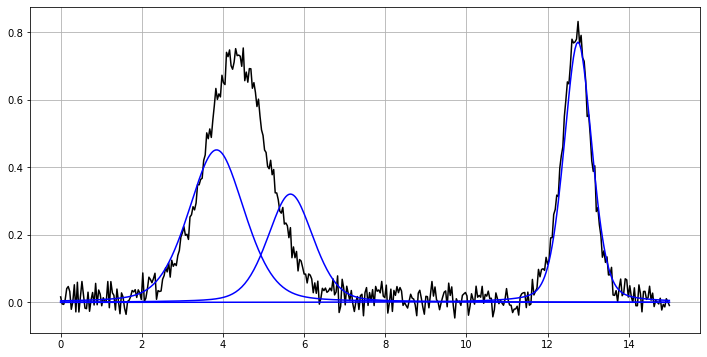

real_center   [ 4.29077897  4.59245162 12.71503149]
predict_center [ 3.8422706 5.6628604 12.748213 ]
---------------
real_width    [1.84007853 1.44902989 0.8273718 ]
predict_center [ 1.6477617 1.3444561 0.82569087 ]
---------------
real_amp      [0.63850102 0.11319527 0.79612114]
predict_center [ 0.45124793 0.32052964 0.77003807 ]


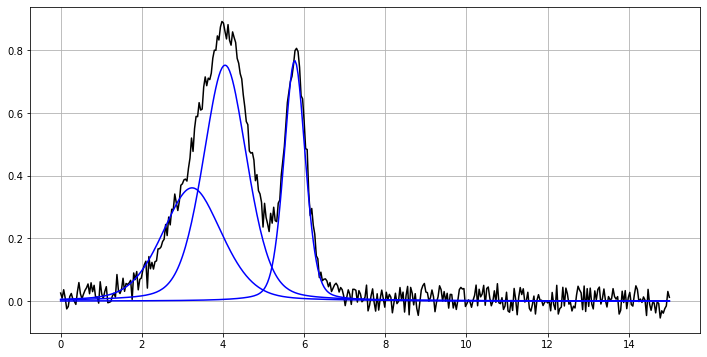

real_center   [3.4330528  4.17041484 5.7923966 ]
predict_center [ 3.2379563 4.05219 5.767308 ]
---------------
real_width    [1.72970601 1.27585935 0.60965805]
predict_center [ 1.7537432 1.2962095 0.6276357 ]
---------------
real_amp      [0.35094455 0.64670851 0.77319024]
predict_center [ 0.36128044 0.752511 0.7671676 ]


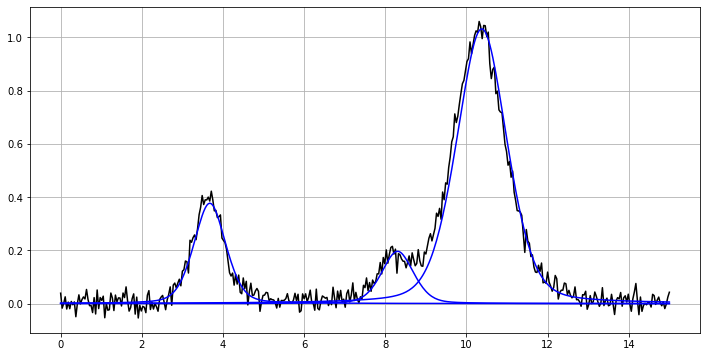

real_center   [ 3.63830327  8.19186524 10.31688595]
predict_center [ 3.6756418 8.30209 10.377976 ]
---------------
real_width    [0.89361038 0.93808552 1.52539188]
predict_center [ 0.933401 0.9343756 1.4772786 ]
---------------
real_amp      [0.40410566 0.1478573  1.0311079 ]
predict_center [ 0.37695986 0.19641897 1.0316223 ]


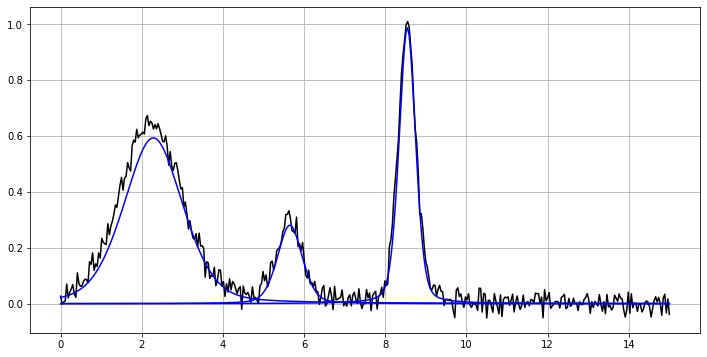

real_center   [2.22113228 5.63142245 8.53521527]
predict_center [ 2.2838297 5.6486034 8.54409 ]
---------------
real_width    [1.83123665 0.6936896  0.51770995]
predict_center [ 1.7394446 0.7301818 0.48171353 ]
---------------
real_amp      [0.65149882 0.29828578 0.99234231]
predict_center [ 0.5926685 0.280802 0.9869335 ]


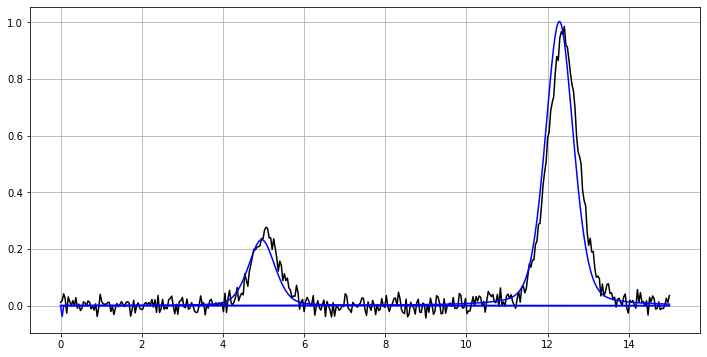

real_center   [ 0.          5.05719729 12.37753699]
predict_center [ 0.037512593 4.953754 12.289185 ]
---------------
real_width    [0.         0.77167319 0.87833169]
predict_center [ -0.026854008 0.7819679 0.8232459 ]
---------------
real_amp      [0.         0.24677949 0.95333039]
predict_center [ -0.038268343 0.23306979 1.0030315 ]


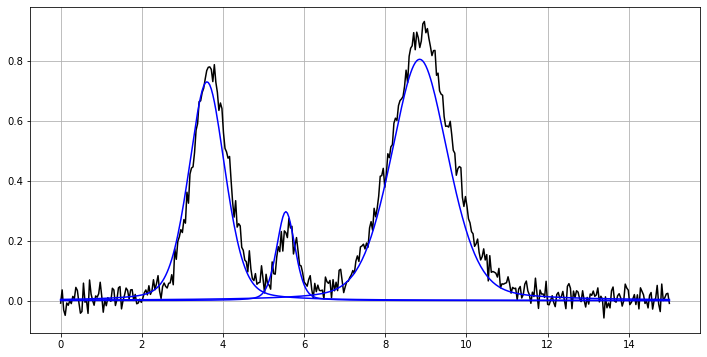

real_center   [3.69017838 5.63066123 8.89696446]
predict_center [ 3.6054466 5.549469 8.846832 ]
---------------
real_width    [1.04149149 0.56732136 1.77351879]
predict_center [ 1.0674914 0.54217595 1.6813577 ]
---------------
real_amp      [0.76832831 0.20555743 0.88825944]
predict_center [ 0.73008066 0.2967229 0.80540097 ]


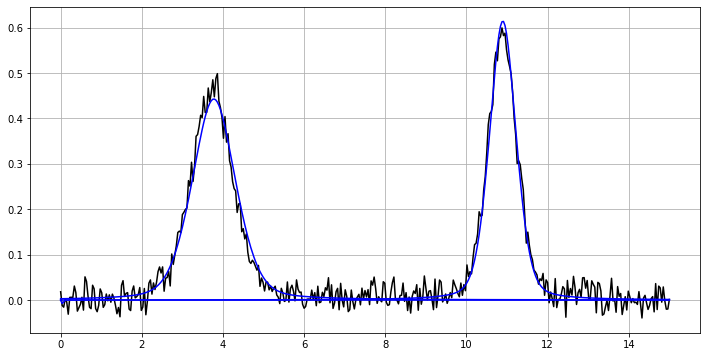

real_center   [ 0.          3.73185882 10.88808114]
predict_center [ 0.05383306 3.7757635 10.896156 ]
---------------
real_width    [0.         1.20181101 0.83048018]
predict_center [ -0.024665564 1.271777 0.7799064 ]
---------------
real_amp      [0.         0.46739952 0.59288203]
predict_center [ -0.023970097 0.44278145 0.61442506 ]


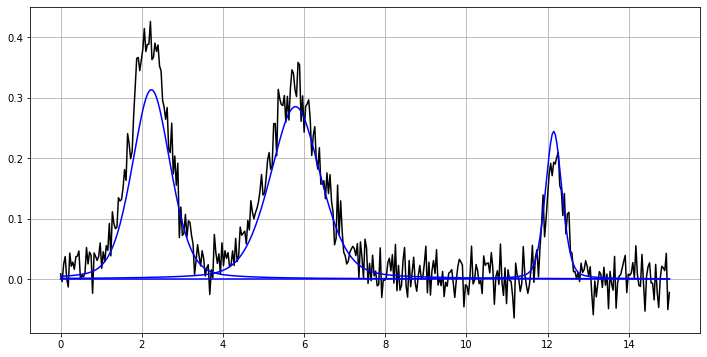

real_center   [ 2.18716925  5.76633972 12.18384236]
predict_center [ 2.2357976 5.7871513 12.14992 ]
---------------
real_width    [1.12730973 1.60042287 0.53237167]
predict_center [ 1.1308935 1.486108 0.48930442 ]
---------------
real_amp      [0.39666556 0.31047703 0.20510435]
predict_center [ 0.31351995 0.2854925 0.24446465 ]


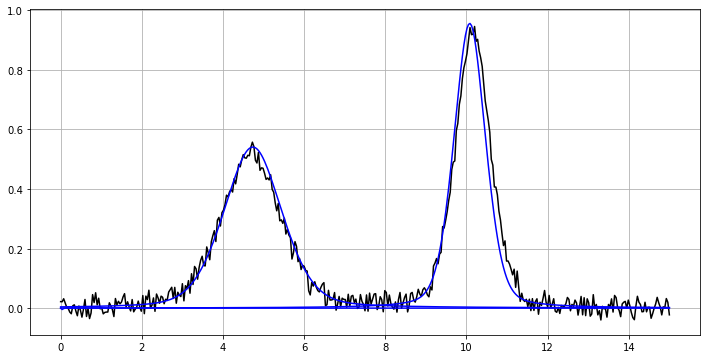

real_center   [ 0.          4.69496696 10.16015163]
predict_center [ 0.053206258 4.7359724 10.0806675 ]
---------------
real_width    [0.         1.72269262 1.02568353]
predict_center [ 0.0186138 1.7207335 0.93273234 ]
---------------
real_amp      [0.         0.51715783 0.92825117]
predict_center [ -0.027881965 0.54066384 0.95568174 ]


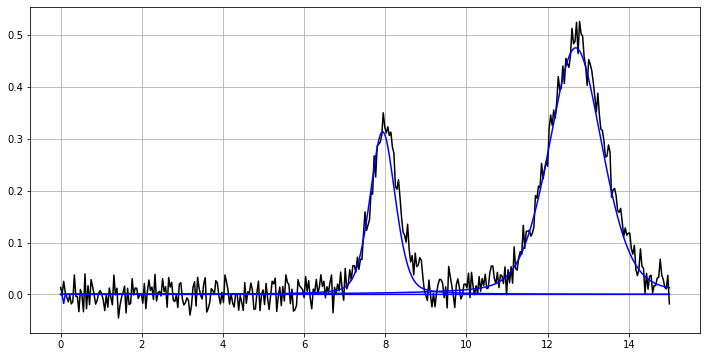

real_center   [ 0.          7.99264759 12.71109573]
predict_center [ 0.06619685 7.933782 12.690845 ]
---------------
real_width    [0.         0.79671959 1.64489334]
predict_center [ -0.027736992 0.7462897 1.5731324 ]
---------------
real_amp      [0.         0.33391437 0.4865217 ]
predict_center [ -0.023867652 0.31377727 0.47519183 ]


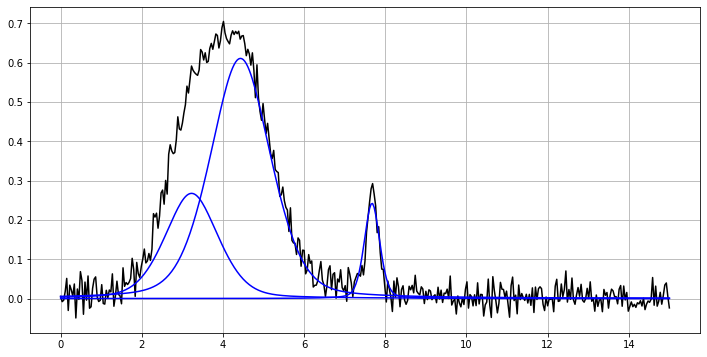

real_center   [3.1789369  4.43462395 7.68299895]
predict_center [ 3.2263536 4.4313836 7.672818 ]
---------------
real_width    [1.42679429 1.8256913  0.31452702]
predict_center [ 1.554506 1.768829 0.45477605 ]
---------------
real_amp      [0.38303396 0.60666816 0.28078193]
predict_center [ 0.26747888 0.61072373 0.24246673 ]


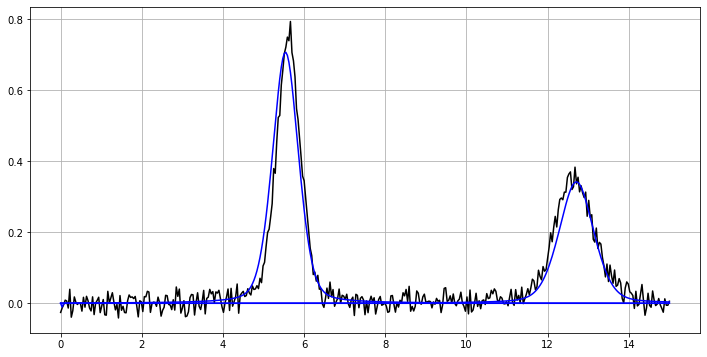

real_center   [ 0.          5.60826513 12.66147569]
predict_center [ 0.046110682 5.540767 12.708445 ]
---------------
real_width    [0.         0.68925346 1.1494085 ]
predict_center [ -0.021515042 0.7645974 1.0152205 ]
---------------
real_amp      [0.         0.76026583 0.34452582]
predict_center [ -0.01666236 0.70639133 0.3417427 ]


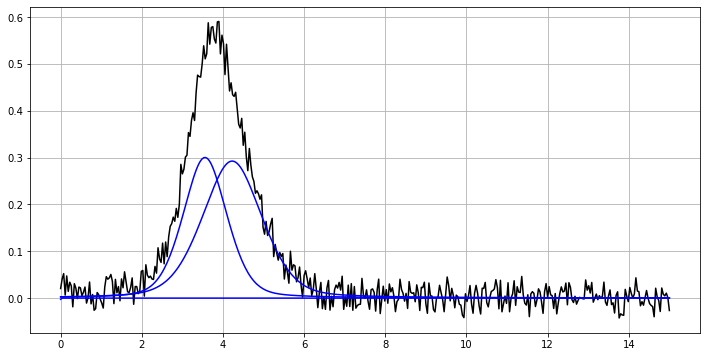

real_center   [0.         3.72184022 4.40775792]
predict_center [ -0.008030362 3.5565524 4.2265153 ]
---------------
real_width    [0.         1.43873061 1.84175469]
predict_center [ -0.012382224 1.284577 1.7462867 ]
---------------
real_amp      [0.         0.46545087 0.14418288]
predict_center [ -0.008132473 0.3002622 0.2925614 ]


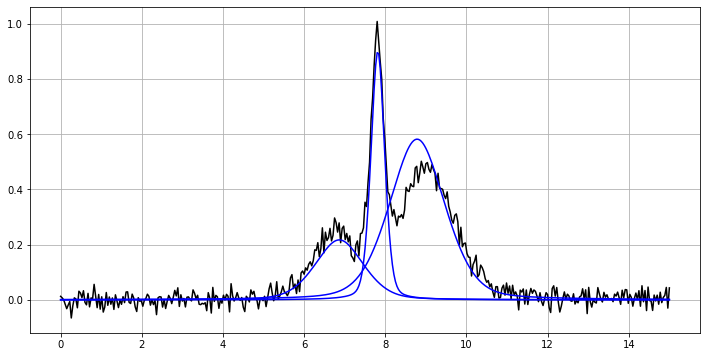

real_center   [6.69953945 7.80237353 9.03524411]
predict_center [ 6.866735 7.815964 8.784049 ]
---------------
real_width    [1.18917952 0.38486048 1.6761552 ]
predict_center [ 1.4121963 0.40158582 1.6306187 ]
---------------
real_amp      [0.23058328 0.80941086 0.46612312]
predict_center [ 0.21710405 0.8998364 0.58179593 ]


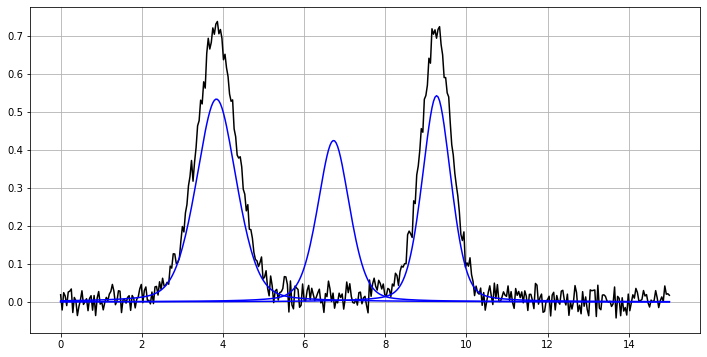

real_center   [0.         3.83724877 9.25541111]
predict_center [ 3.8385363 6.726498 9.264372 ]
---------------
real_width    [0.         1.15304585 0.87274203]
predict_center [ 1.1832035 0.9320022 0.8449768 ]
---------------
real_amp      [0.         0.72044955 0.72501762]
predict_center [ 0.53357744 0.42463988 0.5424179 ]


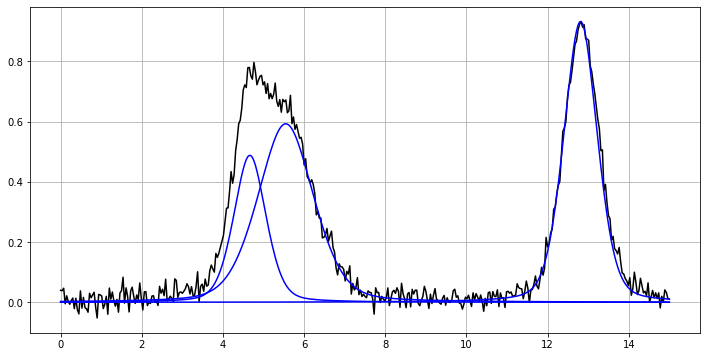

real_center   [ 4.58813656  5.42968556 12.83126287]
predict_center [ 4.6624403 5.546964 12.812111 ]
---------------
real_width    [0.78647949 1.75302107 1.02790254]
predict_center [ 0.9402652 1.6375726 0.9867904 ]
---------------
real_amp      [0.40888093 0.64952474 0.92193438]
predict_center [ 0.48821056 0.59277654 0.93261206 ]


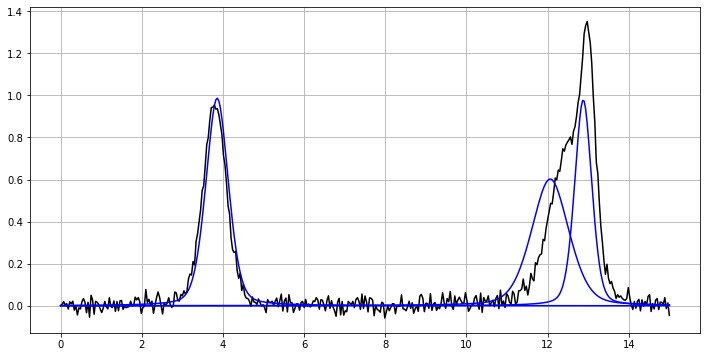

real_center   [ 3.79545288 12.47476029 12.99984432]
predict_center [ 3.8572495 12.06351 12.877888 ]
---------------
real_width    [0.66747658 1.04556205 0.42844032]
predict_center [ 0.6599683 1.0971354 0.50211775 ]
---------------
real_amp      [0.96978901 0.70929102 0.98188484]
predict_center [ 0.9870027 0.60252655 0.979288 ]


In [22]:
for i in range(30,50):

    plt.figure(figsize=(12,6))
    plt.plot(x,test_graph[i] ,color='black')
    plt.plot(x,y(prediction[1][i][0],prediction[2][i][0],prediction[3][i][0],x),color = 'blue')
    plt.plot(x,y(prediction[1][i][1],prediction[2][i][1],prediction[3][i][1],x),color = 'blue')
    plt.plot(x,y(prediction[1][i][2],prediction[2][i][2],prediction[3][i][2],x),color = 'blue')
    plt.grid(True)
    plt.show()
    print('real_center  ',test_center[i])
    print('predict_center','[',prediction[1][i][0],prediction[1][i][1],prediction[1][i][2],']')
    print('---------------')
    print('real_width   ',test_width[i])
    print('predict_center','[',prediction[2][i][0],prediction[2][i][1],prediction[2][i][2],']')
    print('---------------')
    print('real_amp     ',test_amp[i])
    print('predict_center','[',prediction[3][i][0],prediction[3][i][1],prediction[3][i][2],']')
    

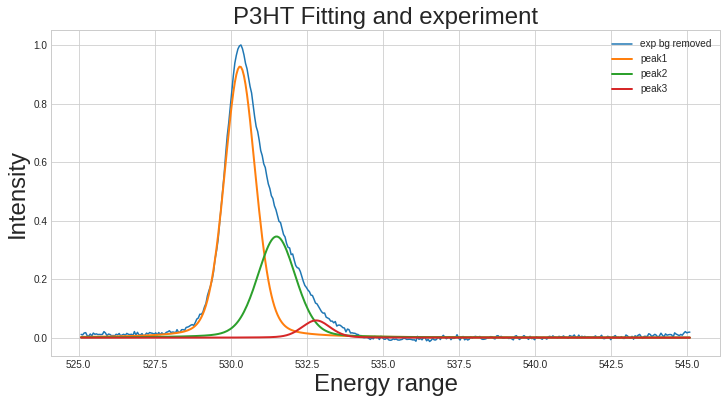

In [23]:
plt.style.use(["seaborn-whitegrid"])
plt.figure(figsize = (12, 6))

# only three peaks
bg = np.loadtxt("ITO_O1s_bg.txt")
exp = np.loadtxt("ITO_O1s_exp.txt")
fitting = np.loadtxt("ITO_O1s_fitting.txt")
peak1 = np.loadtxt("ITO_O1s_p1.txt")
peak2 = np.loadtxt("ITO_O1s_p2.txt")
peak3 = np.loadtxt("ITO_O1s_p3.txt")

# 테스트하고자 하는 실제 XPS 데이터의 parameter 범위가 너무 크므로 
# 네트워크 자체는 작은 규모의 파라미터 범위에서 학습시키고,
# 테스트할 경우, 범위를 줄인 xps 데이터를 불러와서 테스트해본다..

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

#plt.plot(fitting[:, 0], fitting[:, 1] - bg[:, 1], label = "fitting", linewidth = 2)

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.plot(peak3[:, 0], (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)

plt.grid(True)
plt.title("P3HT Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()

(1, 401, 1)


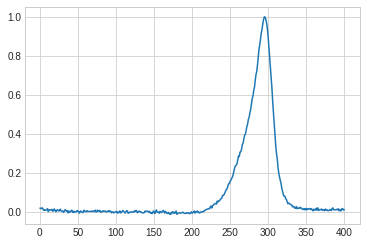

In [24]:
# normalize된 그래프의 y값

test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)
plt.plot(test_result[0])

In [25]:
predict = model.predict(test_result)
print(predict)

[array([[2.26807]], dtype=float32), array([[ 0.04106443, 10.48431   , 11.700787  ]], dtype=float32), array([[0.08174507, 1.4922186 , 0.8075105 ]], dtype=float32), array([[-0.05782285,  0.28700566,  0.8912745 ]], dtype=float32)]


In [26]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [27]:
print(new_predict[0].shape)  # num_peak
print(new_predict[1].shape)  # center
print(new_predict[2].shape)  # width
print(new_predict[3].shape)  # amp

(1,)
(3,)
(3,)
(3,)


In [28]:
peak_1 = [new_predict[1][0], new_predict[2][0], new_predict[3][0]]
peak_2 = [new_predict[1][1], new_predict[2][1], new_predict[3][1]]
peak_3 = [new_predict[1][2], new_predict[2][2], new_predict[3][2]]

Text(0.5, 1.0, 'Network fitting vs real XPS graph')

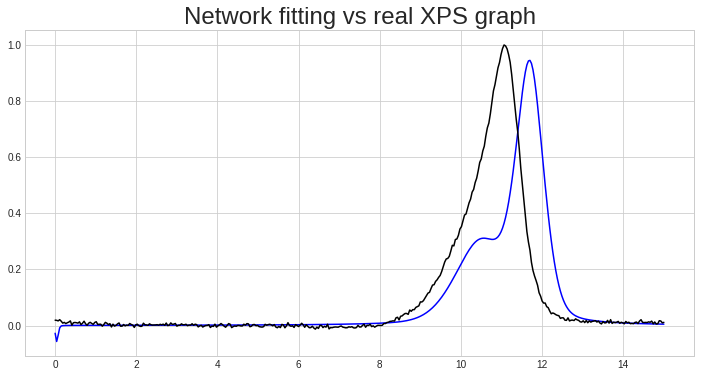

In [29]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x)+
         y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x)+
         y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color = 'blue')
# plt.plot(x,y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x),color = 'blue')
# plt.plot(x,y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color='blue')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed",color='black')
plt.title("Network fitting vs real XPS graph", size = 24)

Text(0.5, 1.0, 'Predict_peak1 vs Xps_peak1')

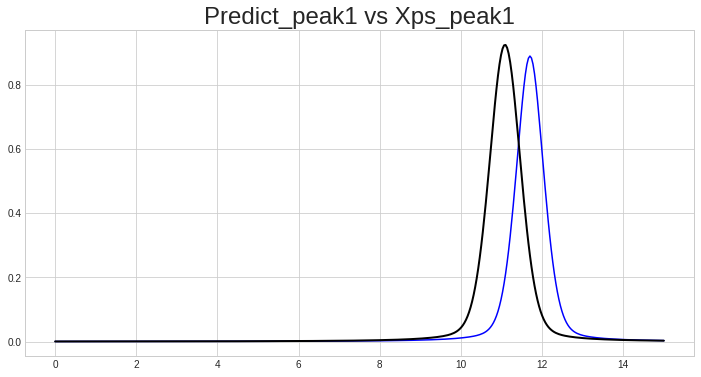

In [30]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color='blue')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2, color='black')
plt.title("Predict_peak1 vs Xps_peak1", size = 24)

Text(0.5, 1.0, 'Pre_peak2 vs Xps_peak2')

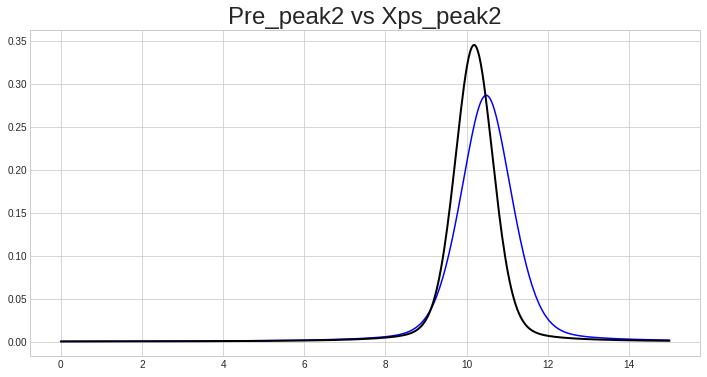

In [31]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x),color='blue')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color = 'black', label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)

Text(0.5, 1.0, 'Pre_peak3 vs Xps_peak3')

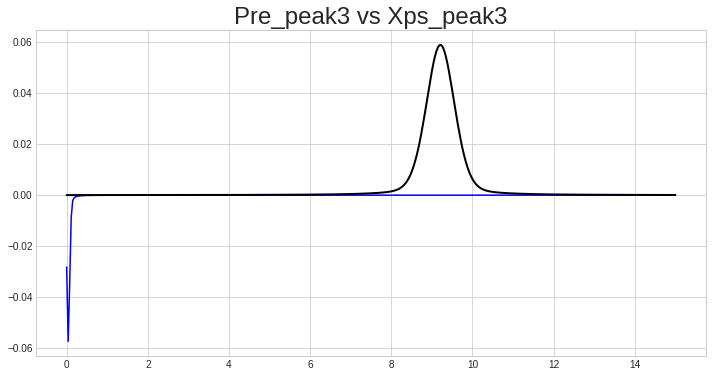

In [32]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x),color='blue')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3',color = 'black', linewidth = 2)
plt.title("Pre_peak3 vs Xps_peak3", size = 24)

In [33]:
new_predict[1][0],new_predict[2][0],new_predict[3][0]

(0.041064434, 0.08174507, -0.057822853)

In [34]:
new_predict[0][0]

2.26807

In [35]:
# only two peak
bg = np.loadtxt("P3HT_S2p_bg.txt")
exp = np.loadtxt("P3HT_S2p_exp.txt")
fitting = np.loadtxt("P3HT_S2p_fitting.txt")
peak1 = np.loadtxt("P3HT_S2p_p1.txt")
peak2 = np.loadtxt("P3HT_S2p_p2.txt")

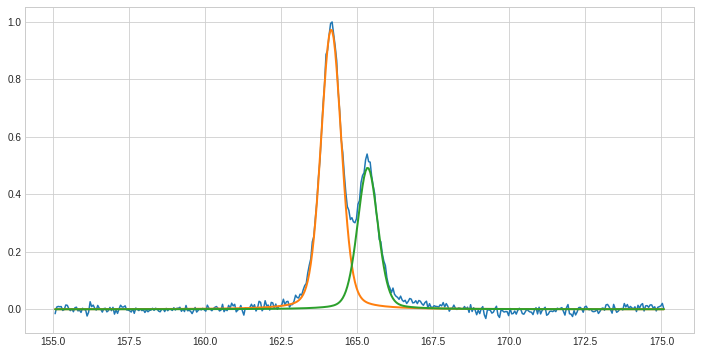

In [36]:
plt.figure(figsize = (12, 6))

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)

In [37]:
# normalize된 그래프의 y값
test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)

(1, 401, 1)


In [38]:
predict = model.predict(test_result)
print(predict)

[array([[2.234834]], dtype=float32), array([[-0.07118268,  7.2914753 ,  8.456401  ]], dtype=float32), array([[0.03624992, 0.707235  , 0.5856509 ]], dtype=float32), array([[-0.01848191,  0.42377555,  0.93767405]], dtype=float32)]


In [39]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [40]:
print(new_predict[0].shape)  #number_peak
print(new_predict[1].shape)  # center
print(new_predict[2].shape)  # width
print(new_predict[3].shape)  # amp

(1,)
(3,)
(3,)
(3,)


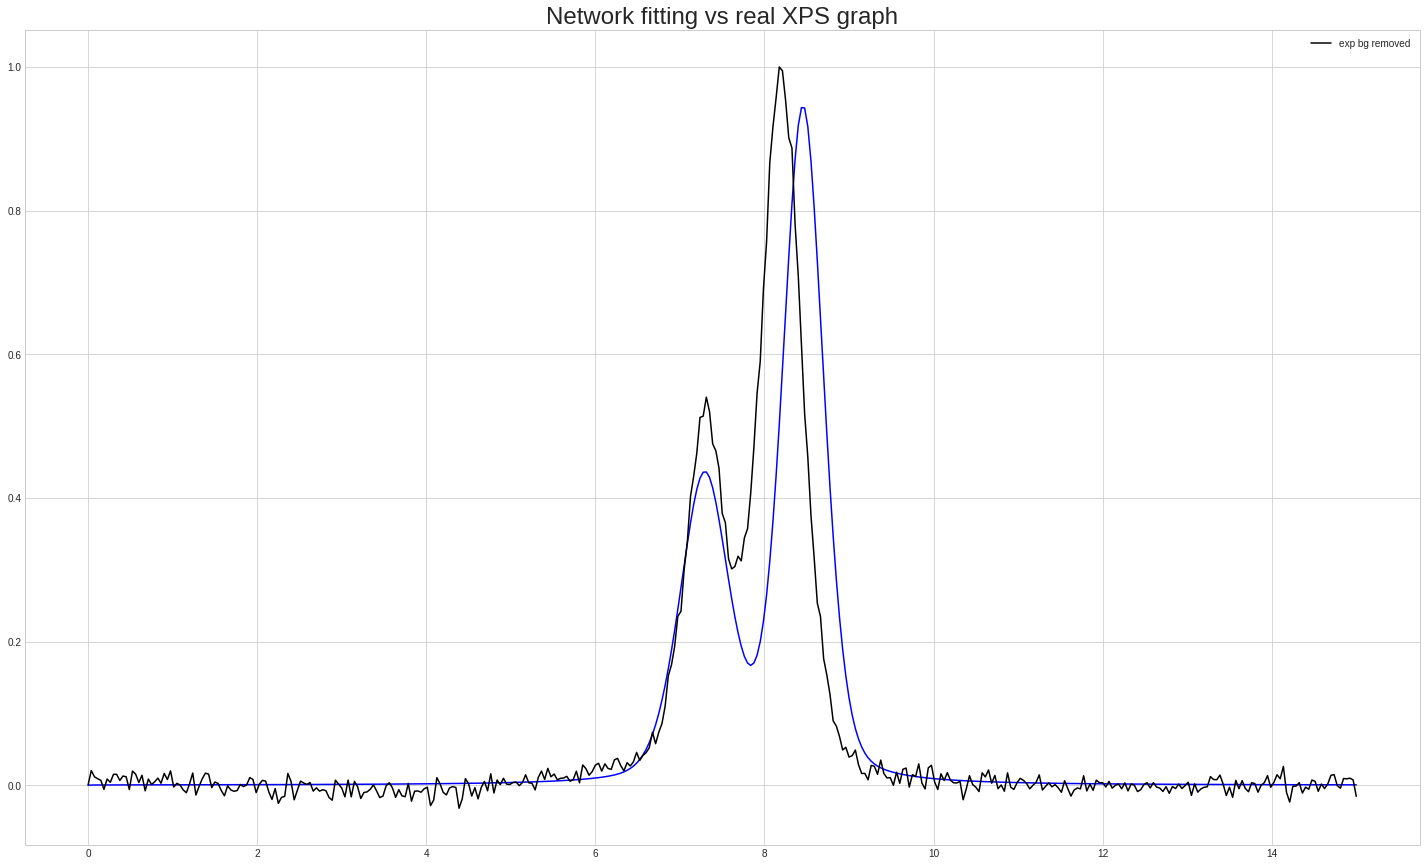

In [41]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x)+
         y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x)+
         y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color = 'blue')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()),color = 'black', label = "exp bg removed")
plt.title("Network fitting vs real XPS graph", size = 24)
plt.legend()

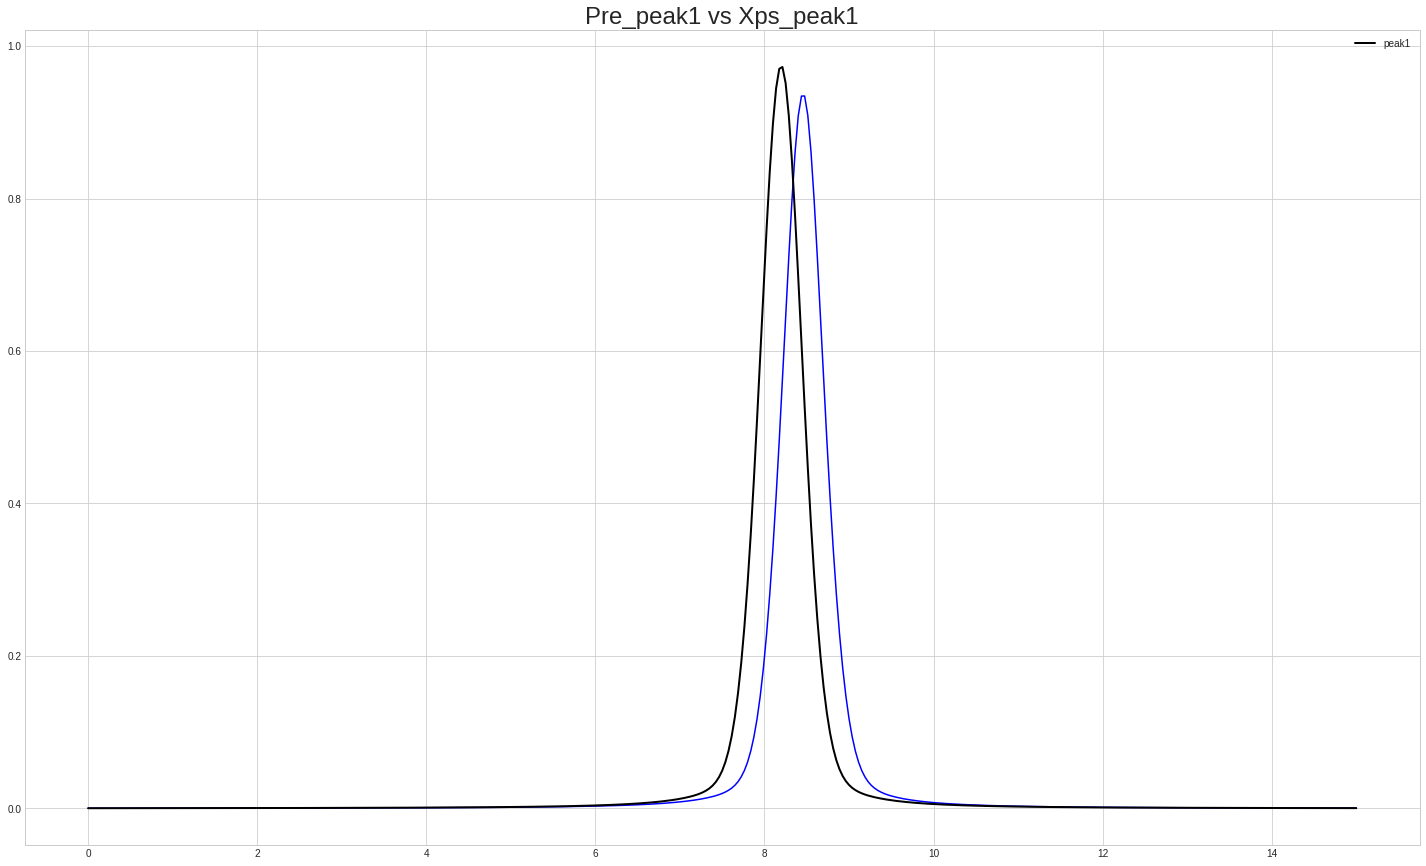

In [42]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color = 'blue')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color='black', label = "peak1", linewidth = 2)
plt.title("Pre_peak1 vs Xps_peak1", size = 24)
plt.legend()

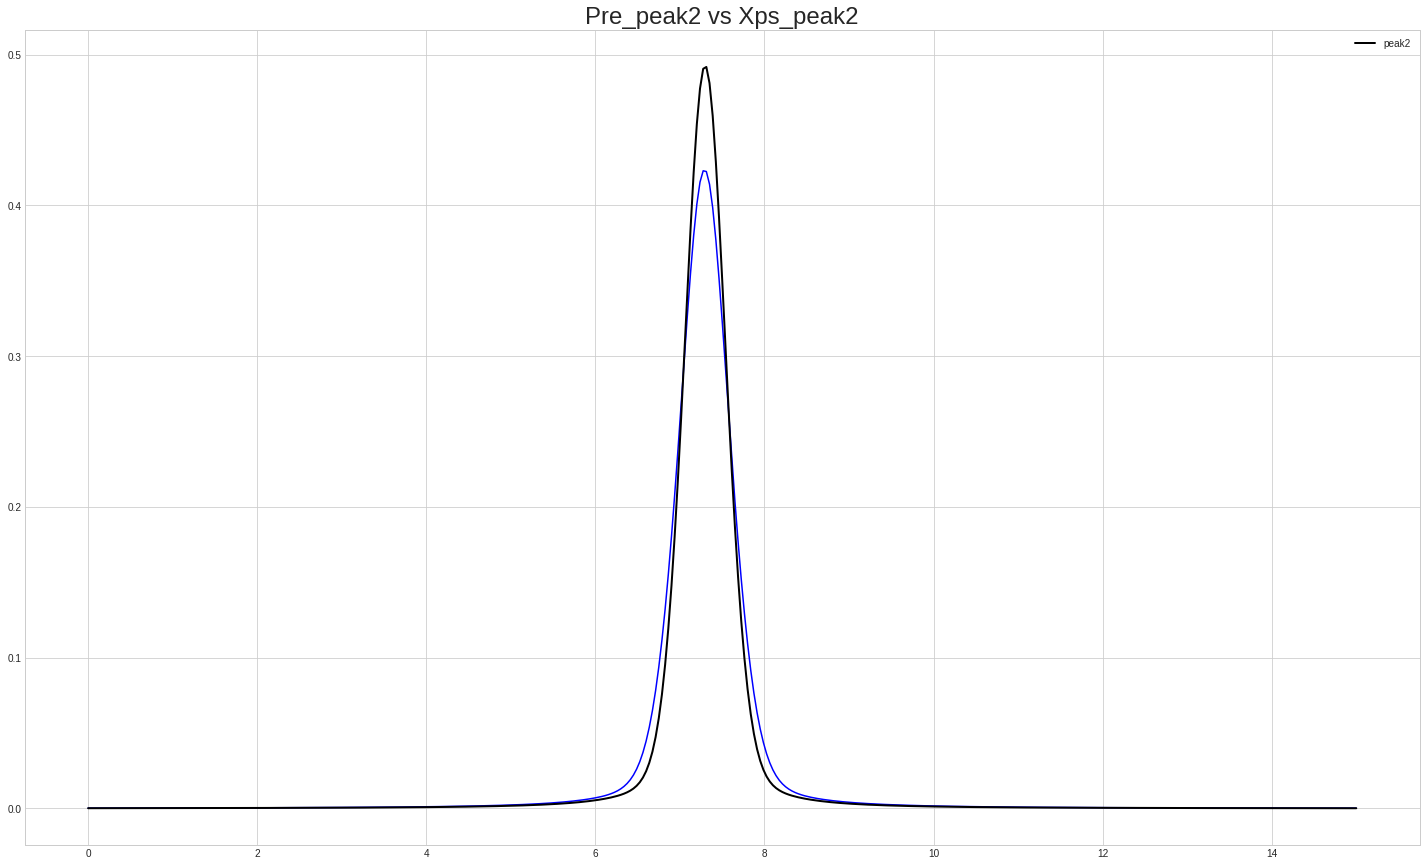

In [43]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x),color = 'blue')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color='black', label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)
plt.legend()

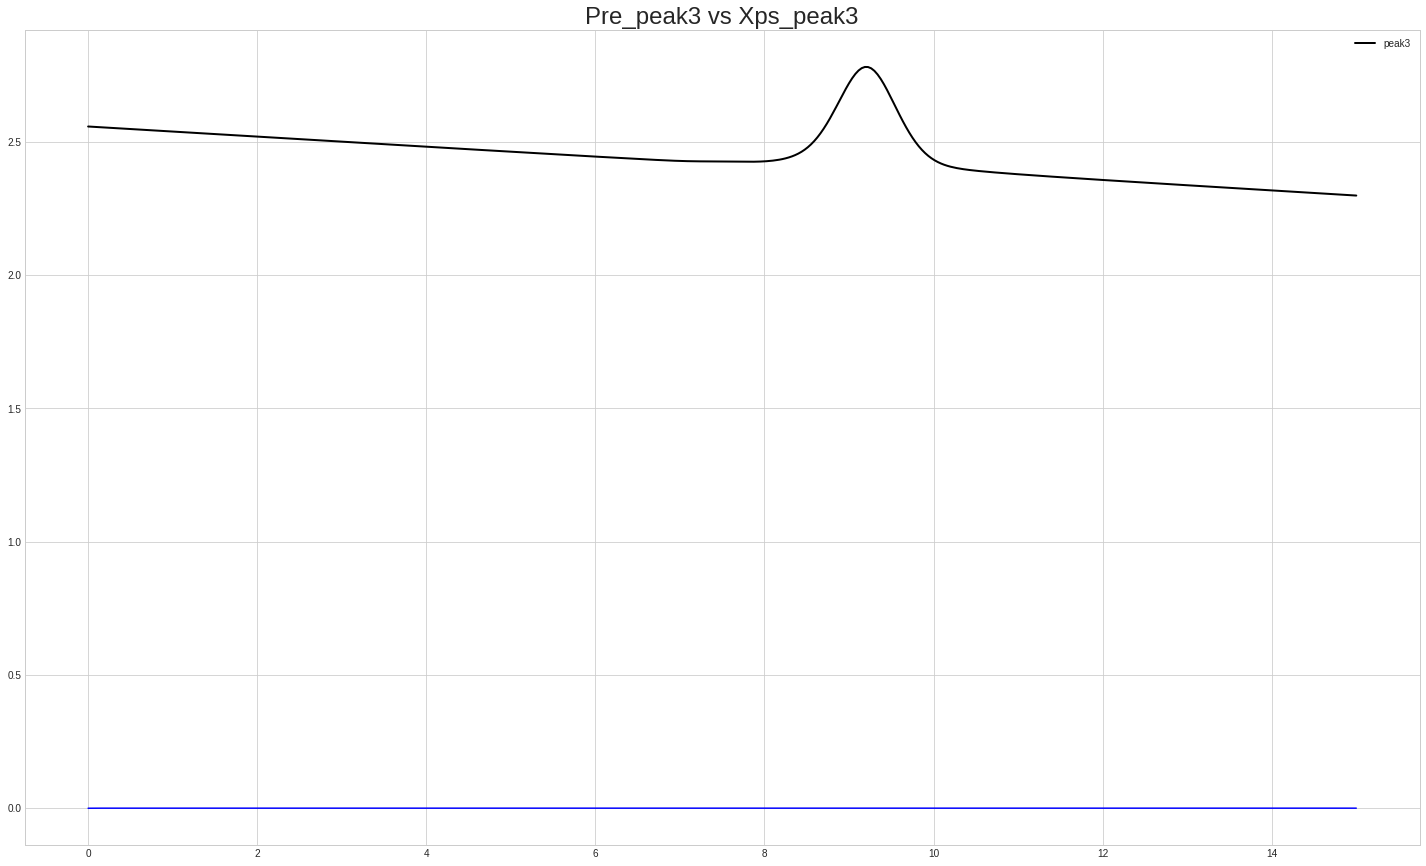

In [44]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x),color = 'blue')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color='black', label = 'peak3', linewidth = 2)
plt.title("Pre_peak3 vs Xps_peak3", size = 24)
plt.legend()

In [45]:
error_center_total=0
for i in range(test_center.shape[0]):
    error_center_total = error_center_total + (abs(prediction[1][i]-test_center[i]))
print('error_center_total = ',error_center_total)
error_center = error_center_total/test_center.shape[0]
print('error_center =  ',error_center)
print('\n')

error_width_total=0
for i in range(test_width.shape[0]):
    error_width_total = error_width_total + (abs(prediction[2][i]-test_width[i]))
print('error_width_total = ',error_width_total)
error_width = error_width_total/test_width.shape[0]
print('error_width =  ',error_width)
print('\n')

error_amp_total=0
for i in range(test_amp.shape[0]):
    error_amp_total = error_amp_total + (abs(prediction[3][i]-test_amp[i]))
print('error_amp_total = ',error_amp_total)
error_amp = error_amp_total/test_amp.shape[0]
print('error_amp =  ',error_amp)
print('\n')

error_peak_number_total=0
for i in range(test_peak_number.shape[0]):
    error_peak_number_total = error_peak_number_total + (abs(prediction[0][i]-test_peak_number[i]))
print('error_peak_number_total = ',error_peak_number_total)
error_peak_number = error_peak_number_total/test_peak_number.shape[0]
print('error_peak_number =  ',error_peak_number)
print('\n')


error_center_total =  [22392.63399276 28451.81878175 16942.82554461]
error_center =   [0.11196317 0.14225909 0.08471413]


error_width_total =  [12506.76956466 16177.28557572 16008.13661492]
error_width =   [0.06253385 0.08088643 0.08004068]


error_amp_total =  [10147.36508331 12928.55766963 11706.30624238]
error_amp =   [0.05073683 0.06464279 0.05853153]


error_peak_number_total =  [2569.444]
error_peak_number =   [0.01284722]




In [46]:
#수정한거
# 데이터를 혹시몰라 내가 항상 하던 8:1:1함
# 오히려 train데이터가 줄어든거지


In [47]:
#바꿀거

# 데이터양 200만개 고정, 새로운 데이터로 확인-> 비슷한 error 값나오는지
# 교수님걸로 내 데이터로 확인
# 데이터량 늘리기

In [48]:
#기억해둘거
# 변동이 심했지만 전차Dense_center,width,amp1->concatenate로 전차할때 보이지 않던 0.05(center)까지 떨어짐(우연일수도..)
# 따라서 굳이 더 정확도를 올리고싶으면.. 전차를 사용하고 콜백을쓰던지..데이터량을 늘리던지..?

In [ ]:
#결과

# 큰 차이는 없으나..조금 받는거 같기도함..
# 180만에서 160만으로 떨어진거니까
# 데이터는 90:9:1로 하자 200만스케일이면
# model7-> 내모델, model12->교수님 조언모델, model13 ->model12에서 8:1:!로데이터한거